# **Credit Card Fraud Detection using Deep Learning**

The aim of this project is to feed credit card transaction data, which has been marked for fraud, into various models and evaluate which model performs best in detecting fraudulent transactions."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('credit_card_fraud.csv')

In [3]:
dataset

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6661,2019-01-22 00:37:57,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,1976-10-18,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
6662,2019-01-22 00:41:24,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",1956-09-01,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
6663,2019-01-22 00:42:49,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",1973-05-16,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
6664,2019-01-22 00:48:49,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


In [4]:
dataset.shape

(6666, 15)

# **Preprocessing the data.**

In [5]:
dataset.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
dataset.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,6666.000000,6666.000000,6666.000000,6.666000e+03,6666.000000,6666.000000,6666.000000
mean,72.151169,39.719401,-110.812883,1.074933e+05,39.718273,-110.822444,0.009451
std,125.781507,5.319824,13.035408,2.887422e+05,5.349734,13.047740,0.096763
min,1.010000,20.027100,-165.672300,4.600000e+01,19.040141,-166.629875,0.000000
25%,10.000000,36.670400,-120.093600,4.710000e+02,36.647607,-119.846388,0.000000
50%,47.040000,39.599400,-111.098500,1.645000e+03,39.538012,-111.013610,0.000000
75%,85.232500,41.696400,-101.136000,3.543900e+04,42.171323,-100.556067,0.000000
max,3178.510000,65.689900,-89.628700,2.383912e+06,66.659242,-88.927438,1.000000


Text(0.5, 0.98, 'Visualizing the Describe Function')

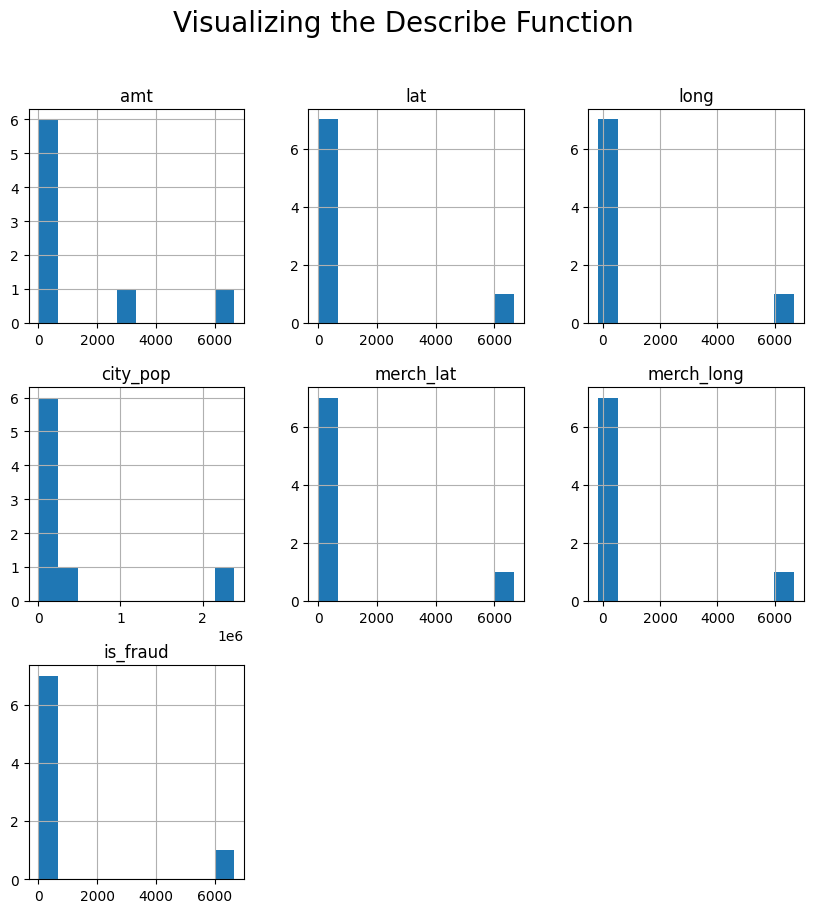

In [7]:
dataset.describe().hist(figsize=(10,10))
plt.suptitle('Visualizing the Describe Function',fontsize=20)

In [8]:
dataset['merchant'].unique

<bound method Series.unique of 0          "Heller, Gutmann and Zieme"
1                       Lind-Buckridge
2                            Kiehn Inc
3                          Beier-Hyatt
4                           Bruen-Yost
                     ...              
6661                      Hudson-Grady
6662    "Nienow, Ankunding and Collie"
6663                  Pacocha-O'Reilly
6664     "Bins, Balistreri and Beatty"
6665                Daugherty-Thompson
Name: merchant, Length: 6666, dtype: object>

In [9]:
dataset['category'].unique()

array(['grocery_pos', 'entertainment', 'shopping_pos', 'misc_pos',
       'shopping_net', 'gas_transport', 'misc_net', 'grocery_net',
       'food_dining', 'health_fitness', 'kids_pets', 'home',
       'personal_care', 'travel'], dtype=object)

In [10]:
dataset['city'].unique()

array(['Orient', 'Malad City', 'Grenada', 'High Rolls Mountain Park',
       'Freedom', 'Honokaa', 'Valentine', 'Westfir', 'Thompson', 'Conway',
       'Athena', 'San Jose', 'Ravenna', 'Parks', 'Fort Washakie',
       'Littleton', 'Meadville', 'Moab', 'Hawthorne', 'Manville',
       'June Lake', 'Sixes', 'Holstein', 'Westerville', 'Ballwin',
       'Fields Landing', 'Louisiana', 'Kansas City', 'Mesa', 'Lonetree',
       'Centerview', 'Colorado Springs', 'Blairsden-Graeagle', 'Cardwell',
       'Phoenix', 'Newhall', 'Tomales', 'Redford', 'Weeping Water',
       'Portland', 'Iliff', 'Burlington', 'Wales', 'Mound City',
       'Greenview', 'Lakeport', 'Llano', 'Carlotta', 'Dumont',
       'Fullerton', 'North Loup', 'Browning', 'Kent', 'Fiddletown',
       'Huntington Beach', 'Meridian', 'Glendale', 'Alva', 'Blairstown',
       'Laguna Hills', 'Albuquerque', 'Azusa', 'Gardiner', 'Rock Springs',
       'Paauilo', 'Eugene', 'Daly City', 'Mendon', 'Powell Butte',
       'Utica', 'Santa Monica

In [11]:
dataset['state'].unique()

array(['WA', 'ID', 'CA', 'NM', 'WY', 'HI', 'NE', 'OR', 'UT', 'AZ', 'CO',
       'MO', 'AK'], dtype=object)

In [12]:
dataset['job'].unique()

array(['Special educational needs teacher', 'Nature conservation officer',
       'Systems analyst', 'Naval architect',
       '"Education officer, museum"', 'Physiotherapist',
       'Network engineer', 'Forensic psychologist',
       '"Surveyor, minerals"', '"Research officer, political party"',
       'Dealer', 'Science writer', '"Solicitor, Scotland"',
       '"Geologist, engineering"', 'Freight forwarder', 'Water engineer',
       'Tourist information centre manager', 'Location manager',
       '"Editor, magazine features"', 'Educational psychologist',
       'Health service manager', 'Retail merchandiser',
       'Telecommunications researcher', 'Product designer',
       '"Engineer, communications"', '"Scientist, audiological"',
       '"Teacher, early years/pre"', 'Counsellor', 'Cartographer',
       'Research scientist (physical sciences)', 'Electronics engineer',
       'Museum/gallery exhibitions officer',
       'Chartered legal executive (England and Wales)',
       'Telev

In [13]:
dataset['trans_num'].unique()

array(['1f76529f8574734946361c461b024d99',
       'a1a22d70485983eac12b5b88dad1cf95',
       '413636e759663f264aae1819a4d4f231', ...,
       '3c346c8cd627c5fe3ed57430db2e9ae7',
       'e66ffcc95ba7fc490486242af1205d04',
       '65e7370f473f9b9d75796c8033a7c929'], dtype=object)

# **EDA**

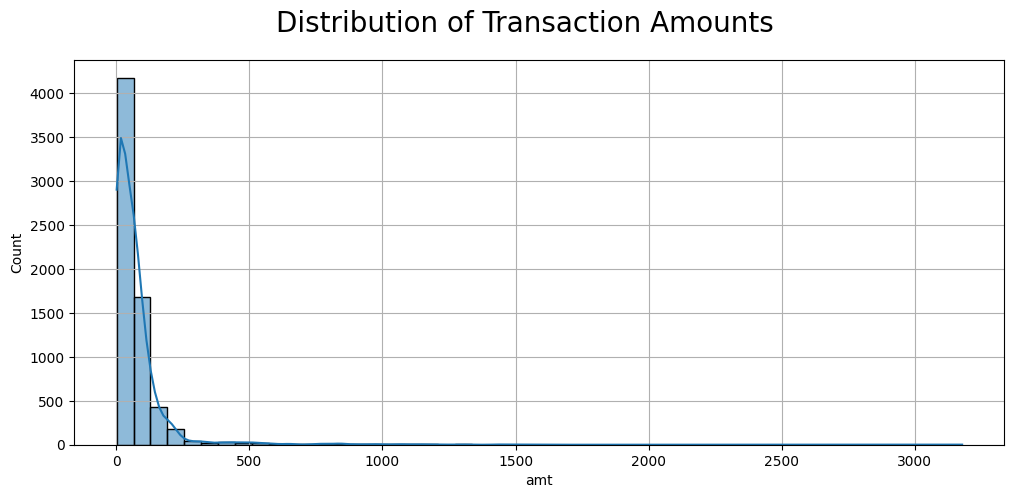

In [14]:
# Distribution of transaction amounts
plt.figure(figsize=(12,5))
sns.histplot(dataset['amt'], bins=50, kde=True)
plt.suptitle('Distribution of Transaction Amounts',fontsize=20)
plt.grid()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'grocery_pos'),
  Text(1, 0, 'entertainment'),
  Text(2, 0, 'shopping_pos'),
  Text(3, 0, 'misc_pos'),
  Text(4, 0, 'shopping_net'),
  Text(5, 0, 'gas_transport'),
  Text(6, 0, 'misc_net'),
  Text(7, 0, 'grocery_net'),
  Text(8, 0, 'food_dining'),
  Text(9, 0, 'health_fitness'),
  Text(10, 0, 'kids_pets'),
  Text(11, 0, 'home'),
  Text(12, 0, 'personal_care'),
  Text(13, 0, 'travel')])

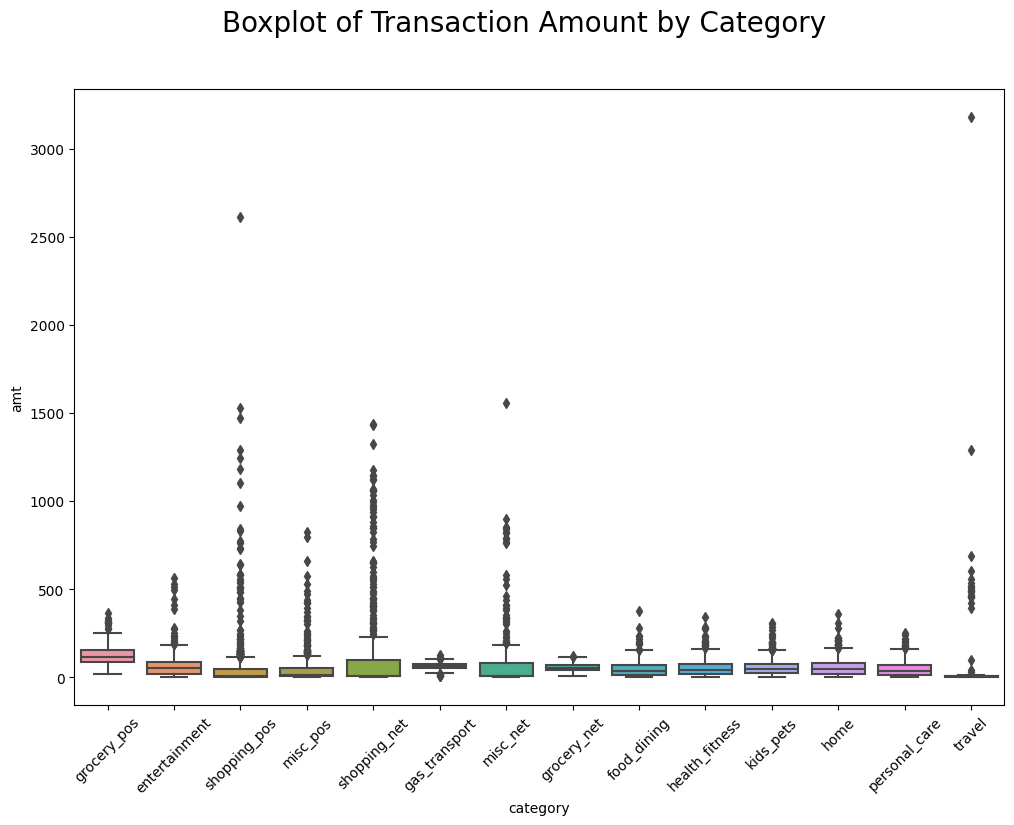

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='amt', data=dataset)
plt.suptitle('Boxplot of Transaction Amount by Category',fontsize=20)
plt.xticks(rotation=45)

Text(0.5, 0.98, 'Fraudulent vs Non-Fraudulent Transactions')

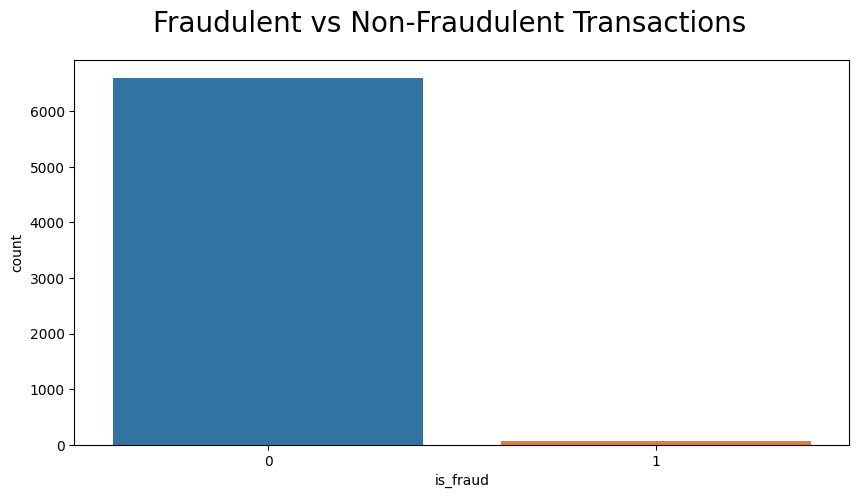

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x='is_fraud', data=dataset)
plt.suptitle('Fraudulent vs Non-Fraudulent Transactions',fontsize=20)

In [17]:
fraud_by_category = dataset.groupby('category')['is_fraud'].mean()
fraud_by_category

category
entertainment     0.008565
food_dining       0.002342
gas_transport     0.009063
grocery_net       0.020661
grocery_pos       0.017028
health_fitness    0.002237
home              0.001488
kids_pets         0.001742
misc_net          0.019231
misc_pos          0.005208
personal_care     0.004211
shopping_net      0.026643
shopping_pos      0.011364
travel            0.005587
Name: is_fraud, dtype: float64

Text(0.5, 0.98, 'Fraud By Category')

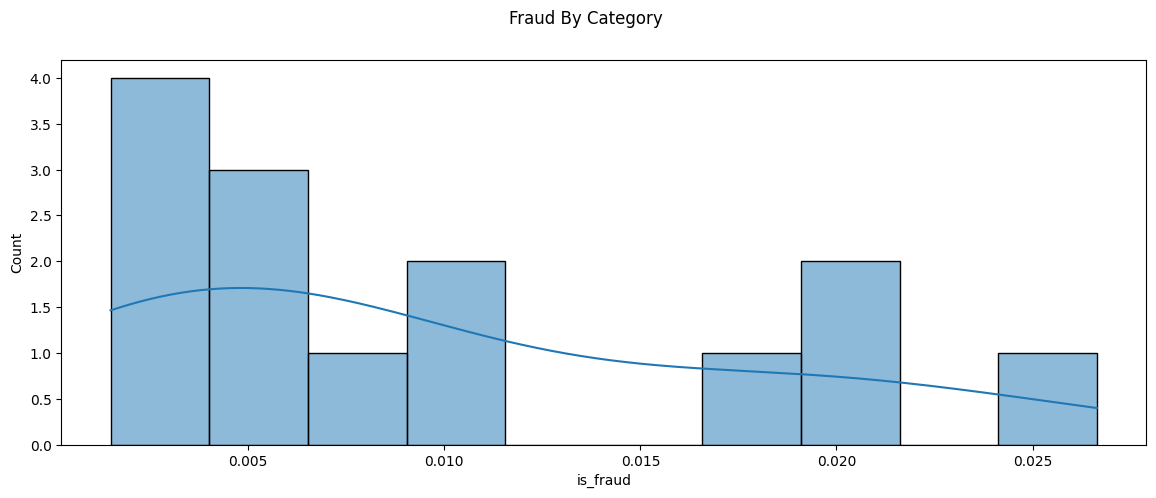

In [18]:
plt.figure(figsize=(14,5))
sns.histplot(data=fraud_by_category,kde=True,bins=10)
plt.suptitle('Fraud By Category')

Text(0.5, 0.98, 'Top 10 Transaction Categories')

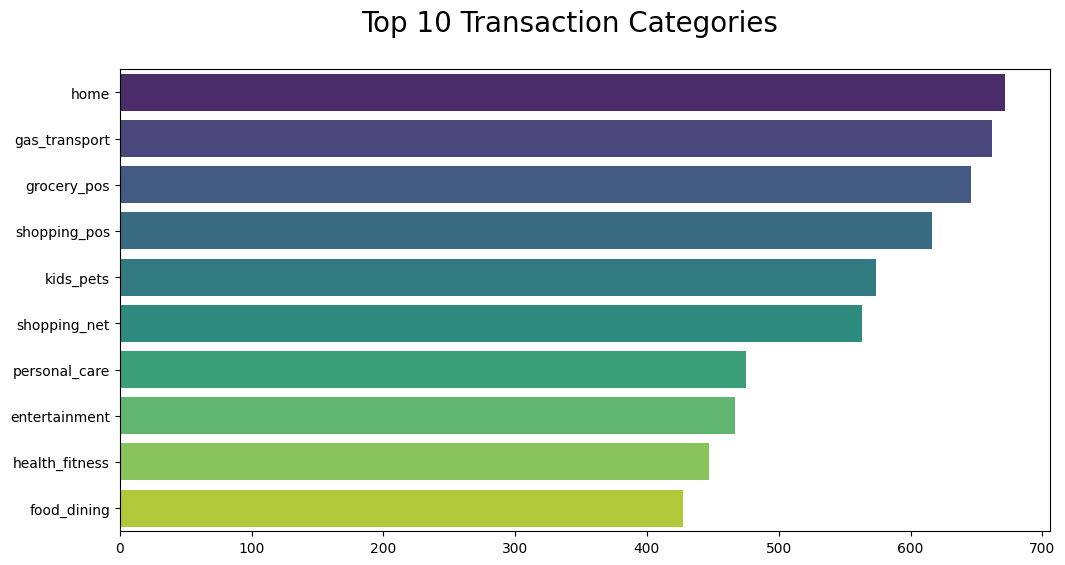

In [19]:
category_counts = dataset['category'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.suptitle('Top 10 Transaction Categories',fontsize=20)

Text(0.5, 0.98, 'Geographical Distribution of Transactions (Latitude vs Longitude)')

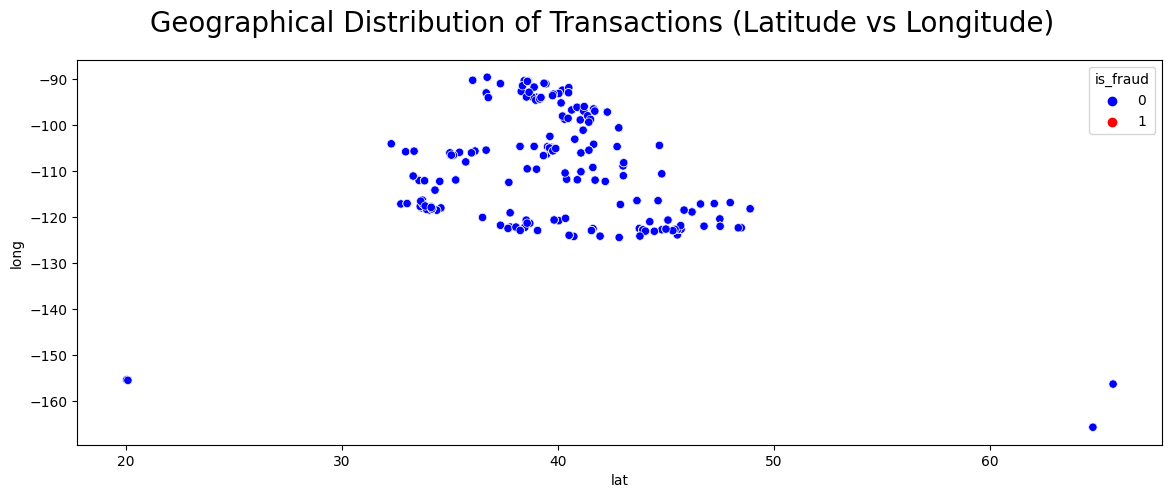

In [20]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='lat', y='long', hue='is_fraud', palette={0: 'blue', 1: 'red'}, data=dataset)
plt.suptitle('Geographical Distribution of Transactions (Latitude vs Longitude)',fontsize=20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12376\1811615176.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')


Text(0.5, 0.98, 'Correlation of the Dataset')

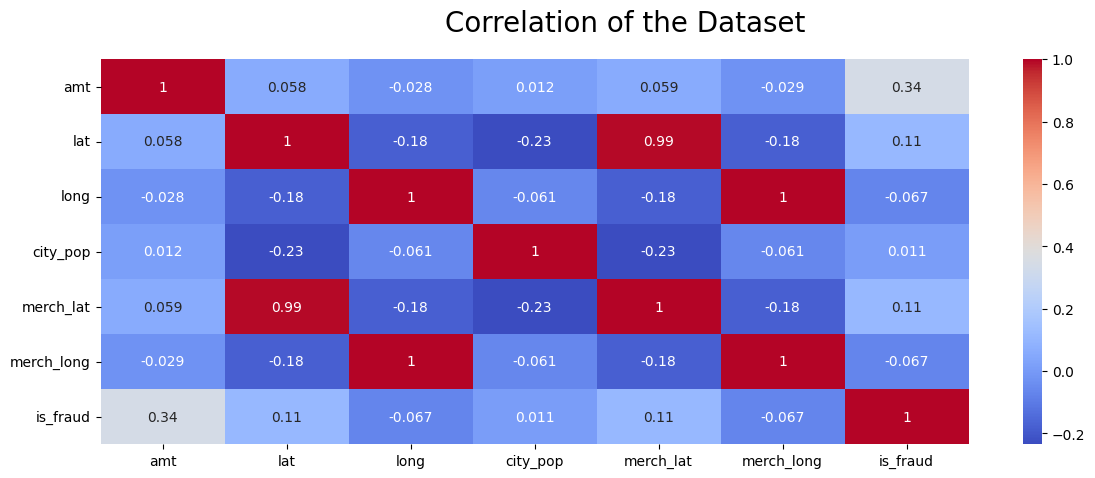

In [21]:
#Let's find the correlation of the dataset using the heatmap
plt.figure(figsize=(14,5))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlation of the Dataset',fontsize=20)

# OUTLIERS

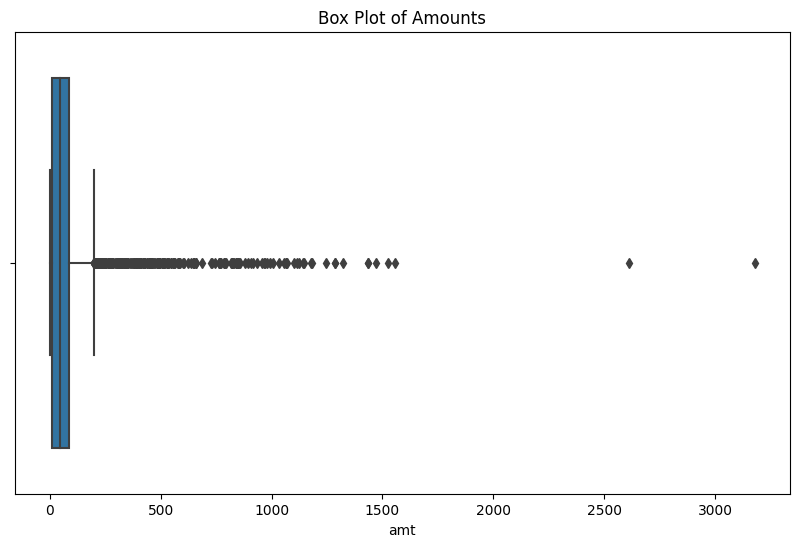

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['amt'])
plt.title('Box Plot of Amounts')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [24]:
label=LabelEncoder()
std=StandardScaler()

In [25]:
#Pre-processing the object data's
dataset['trans_date_trans_time']=label.fit_transform(dataset['trans_date_trans_time'])
dataset['merchant']=label.fit_transform(dataset['merchant'])
dataset['category']=label.fit_transform(dataset['category'])
dataset['city']=label.fit_transform(dataset['city'])
dataset['state']=label.fit_transform(dataset['state'])
dataset['job']=label.fit_transform(dataset['job'])
dataset['dob']=label.fit_transform(dataset['dob'])
dataset['trans_num']=label.fit_transform(dataset['trans_num'])

In [26]:
x=dataset[['merchant','category','city','state','job','amt','lat','long','merch_lat','merch_long']]
y=dataset[['is_fraud']]

In [27]:
dataset

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,0,61,4,107.23,107,11,48.8878,-118.2105,149,136,108,812,49.159047,-118.186462,0
1,1,498,0,220.11,84,5,42.1808,-112.2620,4154,112,53,4172,43.150704,-112.154481,0
2,2,442,4,96.29,46,2,41.6125,-122.5258,589,137,18,1684,41.657520,-122.230347,0
3,3,246,12,7.77,50,8,32.9396,-105.8189,899,113,72,3564,32.863258,-106.520205,0
4,4,277,9,6.85,41,12,43.0172,-111.0292,471,6,70,6348,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6661,6648,409,12,122.00,7,9,45.8289,-118.4971,1302,72,106,2725,46.442439,-118.524214,0
6662,6649,125,9,9.07,43,9,43.7857,-124.1437,260,14,35,199,42.901265,-124.995317,0
6663,6650,547,4,104.84,2,12,44.6873,-104.4414,110,1,91,1551,45.538062,-104.542117,0
6664,6651,14,12,268.16,153,0,64.7556,-165.6723,145,0,11,6004,64.081462,-165.898698,0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [30]:
x_train.shape,y_train.shape

((3999, 10), (3999, 1))

In [31]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Bidirectional

In [32]:
x_train=x_train.values
x_test=x_test.values

In [33]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [34]:
input_shape = (x_train.shape[1],1)

In [35]:
model = Sequential()

In [36]:
# Input layer
model.add(Dense(units=64, activation='relu', input_shape=input_shape))
# Hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
# Output layer
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10, 64)            128       
                                                                 
 dense_1 (Dense)             (None, 10, 32)            2080      
                                                                 
 dense_2 (Dense)             (None, 10, 16)            528       
                                                                 
 dense_3 (Dense)             (None, 10, 1)             17        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
training = model.fit(x_train, y_train, epochs=30, batch_size=55, validation_split=0.2)

Epoch 1/30
59/59 [==============================] - 4s 23ms/step - loss: 0.4516 - accuracy: 0.9089 - val_loss: 0.1755 - val_accuracy: 0.9900
Epoch 2/30
59/59 [==============================] - 0s 7ms/step - loss: 0.1461 - accuracy: 0.9916 - val_loss: 0.1483 - val_accuracy: 0.9900
Epoch 3/30
59/59 [==============================] - 0s 7ms/step - loss: 0.1268 - accuracy: 0.9916 - val_loss: 0.1369 - val_accuracy: 0.9900
Epoch 4/30
59/59 [==============================] - 0s 7ms/step - loss: 0.1174 - accuracy: 0.9916 - val_loss: 0.1282 - val_accuracy: 0.9900
Epoch 5/30
59/59 [==============================] - 0s 6ms/step - loss: 0.1091 - accuracy: 0.9916 - val_loss: 0.1202 - val_accuracy: 0.9900
Epoch 6/30
59/59 [==============================] - 0s 6ms/step - loss: 0.1026 - accuracy: 0.9916 - val_loss: 0.1156 - val_accuracy: 0.9900
Epoch 7/30
59/59 [==============================] - 0s 7ms/step - loss: 0.0999 - accuracy: 0.9916 - val_loss: 0.1142 - val_accuracy: 0.9900
Epoch 8/30
59/59 [=

In [39]:
# Get the training loss and accuracy from the history object
train_loss_ann = training.history['loss'][-1]  # Last epoch's training loss
train_accuracy_ann = training.history['accuracy'][-1]  # Last epoch's training accuracy
print('Loss value in the training phase during ANN is',train_loss_ann)
print('Accuacy value during the training phase during ANN is',train_accuracy_ann)
# Get the validation loss and accuracy from the history object
val_loss_ann = training.history['val_loss'][-1]  # Last epoch's validation loss
val_accuracy_ann = training.history['val_accuracy'][-1]  # Last epoch's validation accuracy
print('Val_loss in the training phase during ANN is',val_loss_ann)
print('Val_acc value during the training phase during ANN is',val_accuracy_ann)

Loss value in the training phase during ANN is 0.06186436489224434
Accuacy value during the training phase during ANN is 0.9915598630905151
Val_loss in the training phase during ANN is 0.06203259900212288
Val_acc value during the training phase during ANN is 0.9900000095367432


In [40]:
test_loss_ann, test_accuracy_ann=model.evaluate(x_test,y_test,batch_size=55)

49/49 [==============================] - 0s 4ms/step - loss: 0.0660 - accuracy: 0.9895


In [41]:
print("Test Loss in ANN:",test_loss_ann)
print("Test Accuracy in ANN:",test_accuracy_ann)

Test Loss in ANN: 0.06603840738534927
Test Accuracy in ANN: 0.9895012974739075


In [42]:
model_1 = Sequential()

In [43]:
# Input layer
model_1.add(LSTM(units=64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
# Hidden layers
model_1.add(Dense(units=32, activation='relu'))
model_1.add(Dense(units=16, activation='relu'))
# Output layer
model_1.add(Dense(units=1, activation='sigmoid'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 19,521
Trainable params: 19,521
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
training_1=model_1.fit(x_train, y_train, epochs=30, batch_size=55, validation_split=0.2)

Epoch 1/30
59/59 [==============================] - 6s 25ms/step - loss: 0.2588 - accuracy: 0.9269 - val_loss: 0.0451 - val_accuracy: 0.9900
Epoch 2/30
59/59 [==============================] - 1s 18ms/step - loss: 0.0365 - accuracy: 0.9919 - val_loss: 0.0409 - val_accuracy: 0.9900
Epoch 3/30
59/59 [==============================] - 1s 19ms/step - loss: 0.0370 - accuracy: 0.9916 - val_loss: 0.0418 - val_accuracy: 0.9900
Epoch 4/30
59/59 [==============================] - 1s 19ms/step - loss: 0.0337 - accuracy: 0.9919 - val_loss: 0.0381 - val_accuracy: 0.9937
Epoch 5/30
59/59 [==============================] - 1s 18ms/step - loss: 0.0397 - accuracy: 0.9903 - val_loss: 0.0385 - val_accuracy: 0.9862
Epoch 6/30
59/59 [==============================] - 1s 20ms/step - loss: 0.0319 - accuracy: 0.9906 - val_loss: 0.0390 - val_accuracy: 0.9900
Epoch 7/30
59/59 [==============================] - 1s 20ms/step - loss: 0.0246 - accuracy: 0.9909 - val_loss: 0.0384 - val_accuracy: 0.9912
Epoch 8/30
59

In [46]:
# Get the training loss and accuracy from the history object
train_loss_lstm = training_1.history['loss'][-1]  # Last epoch's training loss
train_accuracy_lstm = training_1.history['accuracy'][-1]  # Last epoch's training accuracy
print('Loss value in the training phase during LSTM is',train_loss_lstm)
print('Accuacy value during the training phase during LSTM is',train_accuracy_lstm)
# Get the validation loss and accuracy from the history object
val_loss_lstm = training_1.history['val_loss'][-1]  # Last epoch's validation loss
val_accuracy_lstm = training_1.history['val_accuracy'][-1]  # Last epoch's validation accuracy
print('Val_loss in the training phase during LSTM is',val_loss_lstm)
print('Val_acc value during the training phase during LSTM is',val_accuracy_lstm)

Loss value in the training phase during LSTM is 0.023442665114998817
Accuacy value during the training phase during LSTM is 0.9915598630905151
Val_loss in the training phase during LSTM is 0.05701003968715668
Val_acc value during the training phase during LSTM is 0.9887499809265137


In [47]:
test_loss_lstm, test_accuracy_lstm=model_1.evaluate(x_test,y_test,batch_size=55)

49/49 [==============================] - 0s 9ms/step - loss: 0.0446 - accuracy: 0.9880


In [48]:
print("Test Loss in LSTM:",test_loss_lstm)
print("Test Accuracy in LSTM:",test_accuracy_lstm)

Test Loss in LSTM: 0.044635094702243805
Test Accuracy in LSTM: 0.9880015254020691


In [49]:
model_2 = Sequential()

In [50]:
model_2.add(GRU(units=64,activation='relu',input_shape=input_shape))
#Adding hidden layers
model_2.add(Dense(units=32,activation='relu'))
model_2.add(Dense(units=16,activation='relu'))
#Adding output layer
model_2.add(Dense(units=1,activation='sigmoid'))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15,489
Trainable params: 15,489
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
training_2=model_2.fit(x_train, y_train, epochs=30, batch_size=55, validation_split=0.2)

Epoch 1/30
59/59 [==============================] - 7s 25ms/step - loss: 0.2162 - accuracy: 0.9490 - val_loss: 0.0473 - val_accuracy: 0.9937
Epoch 2/30
59/59 [==============================] - 1s 20ms/step - loss: 0.0454 - accuracy: 0.9912 - val_loss: 0.0537 - val_accuracy: 0.9850
Epoch 3/30
59/59 [==============================] - 1s 25ms/step - loss: 0.0385 - accuracy: 0.9900 - val_loss: 0.0483 - val_accuracy: 0.9900
Epoch 4/30
59/59 [==============================] - 1s 16ms/step - loss: 0.0370 - accuracy: 0.9909 - val_loss: 0.0423 - val_accuracy: 0.9900
Epoch 5/30
59/59 [==============================] - 1s 22ms/step - loss: 0.0433 - accuracy: 0.9903 - val_loss: 0.0508 - val_accuracy: 0.9850
Epoch 6/30
59/59 [==============================] - 1s 23ms/step - loss: 0.0427 - accuracy: 0.9916 - val_loss: 0.0618 - val_accuracy: 0.9900
Epoch 7/30
59/59 [==============================] - 2s 26ms/step - loss: 0.0335 - accuracy: 0.9919 - val_loss: 0.0637 - val_accuracy: 0.9800
Epoch 8/30
59

In [53]:
# Get the training loss and accuracy from the history object
train_loss_gru = training_2.history['loss'][-1]  # Last epoch's training loss
train_accuracy_gru = training_2.history['accuracy'][-1]  # Last epoch's training accuracy
print('Loss value in the training phase during GRU is',train_loss_gru)
print('Accuacy value during the training phase during GRU is',train_accuracy_gru)
# Get the validation loss and accuracy from the history object
val_loss_gru = training_2.history['val_loss'][-1]  # Last epoch's validation loss
val_accuracy_gru = training_2.history['val_accuracy'][-1]  # Last epoch's validation accuracy
print('Val_loss in the training phase during GRU is',val_loss_gru)
print('Val_acc value during the training phase during GRU is',val_accuracy_gru)

Loss value in the training phase during GRU is 0.024599583819508553
Accuacy value during the training phase during GRU is 0.9915598630905151
Val_loss in the training phase during GRU is 0.06089925393462181
Val_acc value during the training phase during GRU is 0.9900000095367432


In [54]:
test_loss_gru, test_accuracy_gru=model_2.evaluate(x_test,y_test,batch_size=55)

49/49 [==============================] - 0s 9ms/step - loss: 0.0670 - accuracy: 0.9895


In [55]:
print("Test Loss in GRU:",test_loss_gru)
print("Test Accuracy in GRU:",test_accuracy_gru)

Test Loss in GRU: 0.06703014671802521
Test Accuracy in GRU: 0.9895012974739075


In [56]:
model_3=Sequential()

In [57]:
# Input layer
model_3.add(SimpleRNN(units=64, activation='relu', input_shape=input_shape))
# Hidden layers
model_3.add(Dense(units=32, activation='relu'))
model_3.add(Dense(units=16, activation='relu'))
# Output layer
model_3.add(Dense(units=1, activation='sigmoid'))
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 6,849
Trainable params: 6,849
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
training_3=model_3.fit(x_test,y_test,epochs=30,batch_size=55,validation_split=0.2)

Epoch 1/30
39/39 [==============================] - 5s 30ms/step - loss: 0.0928 - accuracy: 0.9873 - val_loss: 0.0265 - val_accuracy: 0.9963
Epoch 2/30
39/39 [==============================] - 0s 11ms/step - loss: 0.0812 - accuracy: 0.9845 - val_loss: 0.0392 - val_accuracy: 0.9963
Epoch 3/30
39/39 [==============================] - 0s 10ms/step - loss: 0.0666 - accuracy: 0.9869 - val_loss: 0.0352 - val_accuracy: 0.9963
Epoch 4/30
39/39 [==============================] - 0s 10ms/step - loss: 0.0523 - accuracy: 0.9864 - val_loss: 0.0247 - val_accuracy: 0.9963
Epoch 5/30
39/39 [==============================] - 0s 10ms/step - loss: 0.0483 - accuracy: 0.9902 - val_loss: 0.0403 - val_accuracy: 0.9925
Epoch 6/30
39/39 [==============================] - 0s 11ms/step - loss: 0.0470 - accuracy: 0.9873 - val_loss: 0.0322 - val_accuracy: 0.9944
Epoch 7/30
39/39 [==============================] - 0s 11ms/step - loss: 0.0493 - accuracy: 0.9873 - val_loss: 0.0353 - val_accuracy: 0.9944
Epoch 8/30
39

In [60]:
# Get the training loss and accuracy from the history object
train_loss_rnn = training_3.history['loss'][-1]  # Last epoch's training loss
train_accuracy_rnn = training_3.history['accuracy'][-1]  # Last epoch's training accuracy
print('Loss value in the training phase during RNN is',train_loss_rnn)
print('Accuacy value during the training phase during RNN is',train_accuracy_rnn)
# Get the validation loss and accuracy from the history object
val_loss_rnn = training_3.history['val_loss'][-1]  # Last epoch's validation loss
val_accuracy_rnn = training_3.history['val_accuracy'][-1]  # Last epoch's validation accuracy
print('Val_loss in the training phase during RNN is',val_loss_rnn)
print('Val_acc value during the training phase during RNN is',val_accuracy_rnn)

Loss value in the training phase during RNN is 0.03612528741359711
Accuacy value during the training phase during RNN is 0.9878106117248535
Val_loss in the training phase during RNN is 0.03285655751824379
Val_acc value during the training phase during RNN is 0.9925093650817871


In [61]:
test_loss_rnn, test_accuracy_rnn=model_3.evaluate(x_test,y_test,batch_size=55)

49/49 [==============================] - 0s 7ms/step - loss: 0.0293 - accuracy: 0.9906


In [62]:
print("Test Loss in RNN:",test_loss_rnn)
print("Test Accuracy in RNN:",test_accuracy_rnn)

Test Loss in RNN: 0.02928617037832737
Test Accuracy in RNN: 0.9906261563301086


In [63]:
model_4=Sequential()

In [64]:
model_4.add(LSTM(units=64, activation='relu', input_shape=input_shape, return_sequences=True))
model_4.add(LSTM(units=64, activation='relu'))
model_4.add(Dense(units=32, activation='relu'))
model_4.add(Dense(units=16, activation='relu'))
model_4.add(Dense(units=1, activation='sigmoid'))
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 64)            16896     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 52,545
Trainable params: 52,545
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
training_4=model_4.fit(x_train,y_train,epochs=30,batch_size=55,validation_split=0.2)

Epoch 1/30
59/59 [==============================] - 18s 66ms/step - loss: 0.0940 - accuracy: 0.9884 - val_loss: 0.0735 - val_accuracy: 0.9900
Epoch 2/30
59/59 [==============================] - 2s 35ms/step - loss: 0.0547 - accuracy: 0.9900 - val_loss: 0.0382 - val_accuracy: 0.9912
Epoch 3/30
59/59 [==============================] - 2s 34ms/step - loss: 0.0381 - accuracy: 0.9906 - val_loss: 0.0445 - val_accuracy: 0.9875
Epoch 4/30
59/59 [==============================] - 2s 35ms/step - loss: 0.0393 - accuracy: 0.9903 - val_loss: 0.0405 - val_accuracy: 0.9900
Epoch 5/30
59/59 [==============================] - 3s 47ms/step - loss: 0.0380 - accuracy: 0.9922 - val_loss: 0.0383 - val_accuracy: 0.9900
Epoch 6/30
59/59 [==============================] - 2s 36ms/step - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0460 - val_accuracy: 0.9900
Epoch 7/30
59/59 [==============================] - 2s 38ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0351 - val_accuracy: 0.9937
Epoch 8/30
5

In [67]:
# Get the training loss and accuracy from the history object
train_loss_dual_lstm = training_4.history['loss'][-1]  # Last epoch's training loss
train_accuracy_dual_lstm = training_4.history['accuracy'][-1]  # Last epoch's training accuracy
print('Loss value in the training phase during Dual LSTM is',train_loss_dual_lstm)
print('Accuacy value during the training phase during Dual LSTM is',train_accuracy_dual_lstm)
# Get the validation loss and accuracy from the history object
val_loss_dual_lstm = training_4.history['val_loss'][-1]  # Last epoch's validation loss
val_accuracy_dual_lstm = training_4.history['val_accuracy'][-1]  # Last epoch's validation accuracy
print('Val_loss in the training phase during Dual LSTM is',val_loss_dual_lstm)
print('Val_acc value during the training phase during Dual LSTM is',val_accuracy_dual_lstm)

Loss value in the training phase during Dual LSTM is 0.016391150653362274
Accuacy value during the training phase during Dual LSTM is 0.9931228756904602
Val_loss in the training phase during Dual LSTM is 0.04197941720485687
Val_acc value during the training phase during Dual LSTM is 0.9900000095367432


In [68]:
test_loss_dual_lstm, test_accuracy_dual_lstm=model_4.evaluate(x_test,y_test,batch_size=55)

49/49 [==============================] - 1s 13ms/step - loss: 0.0399 - accuracy: 0.9903


In [69]:
print("Test Loss in Dual_LSTM:",test_loss_dual_lstm)
print("Test Accuracy in Dual_LSTM:",test_accuracy_dual_lstm)

Test Loss in Dual_LSTM: 0.039879947900772095
Test Accuracy in Dual_LSTM: 0.9902512431144714


In [70]:
model_5=Sequential()

In [71]:
model_5.add(GRU(units=64, activation='relu', input_shape=input_shape, return_sequences=True))
model_5.add(GRU(units=64, activation='relu'))
model_5.add(Dense(units=32, activation='relu'))
model_5.add(Dense(units=16, activation='relu'))
model_5.add(Dense(units=1, activation='sigmoid'))
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 10, 64)            12864     
                                                                 
 gru_2 (GRU)                 (None, 64)                24960     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 40,449
Trainable params: 40,449
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
training_5=model_5.fit(x_train,y_train,epochs=30,batch_size=55,validation_split=0.2)

Epoch 1/30
59/59 [==============================] - 9s 40ms/step - loss: 0.0696 - accuracy: 0.9906 - val_loss: 0.0519 - val_accuracy: 0.9875
Epoch 2/30
59/59 [==============================] - 2s 28ms/step - loss: 0.0407 - accuracy: 0.9916 - val_loss: 0.0537 - val_accuracy: 0.9925
Epoch 3/30
59/59 [==============================] - 2s 27ms/step - loss: 0.0440 - accuracy: 0.9909 - val_loss: 0.0401 - val_accuracy: 0.9912
Epoch 4/30
59/59 [==============================] - 2s 28ms/step - loss: 0.0370 - accuracy: 0.9909 - val_loss: 0.0441 - val_accuracy: 0.9900
Epoch 5/30
59/59 [==============================] - 2s 27ms/step - loss: 0.0319 - accuracy: 0.9906 - val_loss: 0.0395 - val_accuracy: 0.9912
Epoch 6/30
59/59 [==============================] - 2s 29ms/step - loss: 0.0303 - accuracy: 0.9900 - val_loss: 0.0444 - val_accuracy: 0.9900
Epoch 7/30
59/59 [==============================] - 2s 29ms/step - loss: 0.0289 - accuracy: 0.9900 - val_loss: 0.0552 - val_accuracy: 0.9912
Epoch 8/30
59

In [74]:
# Get the training loss and accuracy from the history object
train_loss_dual_gru = training_5.history['loss'][-1]  # Last epoch's training loss
train_accuracy_dual_gru = training_5.history['accuracy'][-1]  # Last epoch's training accuracy
print('Loss value in the training phase during Dual GRU is',train_loss_dual_gru)
print('Accuacy value during the training phase during Dual GRU is',train_accuracy_dual_gru)
# Get the validation loss and accuracy from the history object
val_loss_dual_gru = training_5.history['val_loss'][-1]  # Last epoch's validation loss
val_accuracy_dual_gru = training_5.history['val_accuracy'][-1]  # Last epoch's validation accuracy
print('Val_loss in the training phase during Dual GRU is',val_loss_dual_gru)
print('Val_acc value during the training phase during Dual GRU is',val_accuracy_dual_gru)

Loss value in the training phase during Dual GRU is 0.025737127289175987
Accuacy value during the training phase during Dual GRU is 0.9912472367286682
Val_loss in the training phase during Dual GRU is 0.0579640232026577
Val_acc value during the training phase during Dual GRU is 0.9900000095367432


In [75]:
test_loss_dual_gru, test_accuracy_dual_gru=model_5.evaluate(x_test,y_test,batch_size=55)

49/49 [==============================] - 1s 9ms/step - loss: 0.0458 - accuracy: 0.9895


In [76]:
print("Test Loss in Dual_GRU:",test_loss_dual_gru)
print("Test Accuracy in Dual_GRU:",test_accuracy_dual_gru)

Test Loss in Dual_GRU: 0.045828208327293396
Test Accuracy in Dual_GRU: 0.9895012974739075


In [77]:
model_6=Sequential()

In [78]:
model_6.add(LSTM(units=64, activation='relu', input_shape=input_shape, return_sequences=True))
model_6.add(GRU(units=64, activation='relu'))
model_6.add(Dense(units=32, activation='relu'))
model_6.add(Dense(units=16, activation='relu'))
model_6.add(Dense(units=1, activation='sigmoid'))
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 64)            16896     
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 44,481
Trainable params: 44,481
Non-trainable params: 0
_________________________________________________________________


In [79]:
model_6.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
training_6=model_6.fit(x_train,y_train,epochs=30,batch_size=55,validation_split=0.2)

Epoch 1/30
59/59 [==============================] - 8s 42ms/step - loss: 0.0621 - accuracy: 0.9916 - val_loss: 0.0409 - val_accuracy: 0.9937
Epoch 2/30
59/59 [==============================] - 2s 29ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0394 - val_accuracy: 0.9900
Epoch 3/30
59/59 [==============================] - 2s 28ms/step - loss: 0.0309 - accuracy: 0.9916 - val_loss: 0.0530 - val_accuracy: 0.9900
Epoch 4/30
59/59 [==============================] - 2s 30ms/step - loss: 0.0325 - accuracy: 0.9916 - val_loss: 0.0463 - val_accuracy: 0.9900
Epoch 5/30
59/59 [==============================] - 2s 30ms/step - loss: 0.0301 - accuracy: 0.9916 - val_loss: 0.0655 - val_accuracy: 0.9900
Epoch 6/30
59/59 [==============================] - 2s 30ms/step - loss: 0.0308 - accuracy: 0.9916 - val_loss: 0.0422 - val_accuracy: 0.9900
Epoch 7/30
59/59 [==============================] - 2s 31ms/step - loss: 0.0391 - accuracy: 0.9909 - val_loss: 0.0413 - val_accuracy: 0.9900
Epoch 8/30
59

In [81]:
# Get the training loss and accuracy from the history object
train_loss_lstm_gru = training_6.history['loss'][-1]  # Last epoch's training loss
train_accuracy_lstm_gru = training_6.history['accuracy'][-1]  # Last epoch's training accuracy
print('Loss value in the training phase during LSTM GRU is',train_loss_lstm_gru)
print('Accuacy value during the training phase during LSTM GRU is',train_accuracy_lstm_gru)
# Get the validation loss and accuracy from the history object
val_loss_lstm_gru = training_6.history['val_loss'][-1]  # Last epoch's validation loss
val_accuracy_lstm_gru = training_6.history['val_accuracy'][-1]  # Last epoch's validation accuracy
print('Val_loss in the training phase during LSTM GRU is',val_loss_lstm_gru)
print('Val_acc value during the training phase during LSTM GRU is',val_accuracy_lstm_gru)

Loss value in the training phase during LSTM GRU is 0.014399925246834755
Accuacy value during the training phase during LSTM GRU is 0.9949984550476074
Val_loss in the training phase during LSTM GRU is 0.037441715598106384
Val_acc value during the training phase during LSTM GRU is 0.9925000071525574


In [82]:
test_loss_lstm_gru, test_accuracy_lstm_gru=model_6.evaluate(x_test,y_test,batch_size=55)

49/49 [==============================] - 1s 13ms/step - loss: 0.0386 - accuracy: 0.9899


In [83]:
print("Test Loss in LSTM_GRU:",test_loss_lstm_gru)
print("Test Accuracy in LSTM_GRU:",test_accuracy_lstm_gru)

Test Loss in LSTM_GRU: 0.03857942298054695
Test Accuracy in LSTM_GRU: 0.9898762702941895


In [84]:
model_7=Sequential()

In [85]:
model_7.add(Bidirectional(LSTM(units=64, activation='relu', return_sequences=True), input_shape=input_shape))
model_7.add(Bidirectional(LSTM(units=64, activation='relu')))
model_7.add(Dense(units=32, activation='relu'))
model_7.add(Dense(units=16, activation='relu'))
model_7.add(Dense(units=1, activation='sigmoid'))
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 10, 128)          33792     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_22 (Dense)            (None, 32)                4128      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 137,281
Trainable params: 137,281
Non-tr

In [86]:
model_7.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [87]:
training_7=model_7.fit(x_train,y_train,epochs=30,batch_size=55,validation_split=0.2)

Epoch 1/30
59/59 [==============================] - 15s 76ms/step - loss: 0.4779 - accuracy: 0.9222 - val_loss: 0.0866 - val_accuracy: 0.9900
Epoch 2/30
59/59 [==============================] - 3s 52ms/step - loss: 0.0474 - accuracy: 0.9900 - val_loss: 0.0674 - val_accuracy: 0.9875
Epoch 3/30
59/59 [==============================] - 4s 65ms/step - loss: 0.0543 - accuracy: 0.9894 - val_loss: 0.0673 - val_accuracy: 0.9850
Epoch 4/30
59/59 [==============================] - 3s 54ms/step - loss: 0.0496 - accuracy: 0.9881 - val_loss: 0.0791 - val_accuracy: 0.9787
Epoch 5/30
59/59 [==============================] - 4s 65ms/step - loss: 0.0611 - accuracy: 0.9881 - val_loss: 0.0653 - val_accuracy: 0.9887
Epoch 6/30
59/59 [==============================] - 3s 52ms/step - loss: 0.0442 - accuracy: 0.9912 - val_loss: 0.0426 - val_accuracy: 0.9912
Epoch 7/30
59/59 [==============================] - 3s 52ms/step - loss: 0.0409 - accuracy: 0.9912 - val_loss: 0.0517 - val_accuracy: 0.9887
Epoch 8/30
5

In [88]:
# Get the training loss and accuracy from the history object
train_loss_bi_lstm = training_7.history['loss'][-1]  # Last epoch's training loss
train_accuracy_bi_lstm = training_7.history['accuracy'][-1]  # Last epoch's training accuracy
print('Loss value in the training phase during Bi-LSTM is',train_loss_bi_lstm)
print('Accuacy value during the training phase during Bi-LSTM is',train_accuracy_bi_lstm)
# Get the validation loss and accuracy from the history object
val_loss_bi_lstm = training_7.history['val_loss'][-1]  # Last epoch's validation loss
val_accuracy_bi_lstm = training_7.history['val_accuracy'][-1]  # Last epoch's validation accuracy
print('Val_loss in the training phase during Bi-LSTM is',val_loss_bi_lstm)
print('Val_acc value during the training phase during Bi-LSTM is',val_accuracy_bi_lstm)

Loss value in the training phase during Bi-LSTM is 0.03460703790187836
Accuacy value during the training phase during Bi-LSTM is 0.990309476852417
Val_loss in the training phase during Bi-LSTM is 0.04834764823317528
Val_acc value during the training phase during Bi-LSTM is 0.9912499785423279


In [89]:
test_loss_bi_lstm, test_accuracy_bi_lstm=model_7.evaluate(x_test,y_test,batch_size=55)

49/49 [==============================] - 1s 19ms/step - loss: 0.0589 - accuracy: 0.9903


In [90]:
print("Test Loss in Bi-LSTM:",test_loss_bi_lstm)
print("Test Accuracy in Bi-LSTM:",test_accuracy_bi_lstm)

Test Loss in Bi-LSTM: 0.05885739624500275
Test Accuracy in Bi-LSTM: 0.9902512431144714


In [91]:
model_8=Sequential()

In [92]:
model_8.add(Bidirectional(GRU(units=64, activation='relu', return_sequences=True), input_shape=input_shape))
model_8.add(Bidirectional(GRU(units=64, activation='relu')))
model_8.add(Dense(units=32, activation='relu'))
model_8.add(Dense(units=16, activation='relu'))
model_8.add(Dense(units=1, activation='sigmoid'))
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 10, 128)          25728     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                                 
 dense_25 (Dense)            (None, 32)                4128      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 104,897
Trainable params: 104,897
Non-tr

In [93]:
model_8.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [94]:
training_8=model_8.fit(x_train,y_train,epochs=30,batch_size=55,validation_split=0.2)

Epoch 1/30
59/59 [==============================] - 18s 75ms/step - loss: 0.0921 - accuracy: 0.9722 - val_loss: 0.0551 - val_accuracy: 0.9900
Epoch 2/30
59/59 [==============================] - 4s 68ms/step - loss: 0.0453 - accuracy: 0.9919 - val_loss: 0.0606 - val_accuracy: 0.9837
Epoch 3/30
59/59 [==============================] - 3s 50ms/step - loss: 0.0442 - accuracy: 0.9912 - val_loss: 0.0487 - val_accuracy: 0.9875
Epoch 4/30
59/59 [==============================] - 3s 48ms/step - loss: 0.0340 - accuracy: 0.9906 - val_loss: 0.0587 - val_accuracy: 0.9912
Epoch 5/30
59/59 [==============================] - 3s 53ms/step - loss: 0.0366 - accuracy: 0.9919 - val_loss: 0.0608 - val_accuracy: 0.9837
Epoch 6/30
59/59 [==============================] - 3s 56ms/step - loss: 0.0393 - accuracy: 0.9900 - val_loss: 0.0466 - val_accuracy: 0.9900
Epoch 7/30
59/59 [==============================] - 3s 52ms/step - loss: 0.0336 - accuracy: 0.9912 - val_loss: 0.0644 - val_accuracy: 0.9825
Epoch 8/30
5

In [95]:
# Get the training loss and accuracy from the history object
train_loss_bi_gru = training_8.history['loss'][-1]  # Last epoch's training loss
train_accuracy_bi_gru = training_8.history['accuracy'][-1]  # Last epoch's training accuracy
print('Loss value in the training phase during Bi-GRU is',train_loss_bi_gru)
print('Accuacy value during the training phase during Bi-GRU is',train_accuracy_bi_gru)
# Get the validation loss and accuracy from the history object
val_loss_bi_gru = training_8.history['val_loss'][-1]  # Last epoch's validation loss
val_accuracy_bi_gru = training_8.history['val_accuracy'][-1]  # Last epoch's validation accuracy
print('Val_loss in the training phase during Bi-GRU is',val_loss_bi_gru)
print('Val_acc value during the training phase during Bi-GRU is',val_accuracy_bi_gru)

Loss value in the training phase during Bi-GRU is 0.02643693797290325
Accuacy value during the training phase during Bi-GRU is 0.9906220436096191
Val_loss in the training phase during Bi-GRU is 0.04822896048426628
Val_acc value during the training phase during Bi-GRU is 0.9887499809265137


In [96]:
test_loss_bi_gru, test_accuracy_bi_gru=model_8.evaluate(x_test,y_test,batch_size=55)

49/49 [==============================] - 1s 15ms/step - loss: 0.0443 - accuracy: 0.9884


In [97]:
print("Test Loss in Bi-GRU:",test_loss_bi_gru)
print("Test Accuracy in Bi-GRU:",test_accuracy_bi_gru)

Test Loss in Bi-GRU: 0.04426835477352142
Test Accuracy in Bi-GRU: 0.9883764386177063


In [98]:
model_name=['FFNN','LSTM','GRU','SimpleRNN','DualLSTM','DualGRU','LSTM-GRU','Bi-LSTM','Bi-GRU']
model_train_score=[train_accuracy_ann,train_accuracy_lstm,train_accuracy_gru,train_accuracy_rnn,train_accuracy_dual_lstm,train_accuracy_dual_gru,train_accuracy_lstm_gru,train_accuracy_bi_lstm,train_accuracy_bi_gru]
model_test_score=[test_accuracy_ann,test_accuracy_lstm,test_accuracy_gru,test_accuracy_rnn,test_accuracy_dual_lstm,test_accuracy_dual_gru,test_accuracy_lstm_gru,test_accuracy_bi_lstm,test_accuracy_bi_gru]

Text(0.5, 0.98, 'Model Train Value Score')

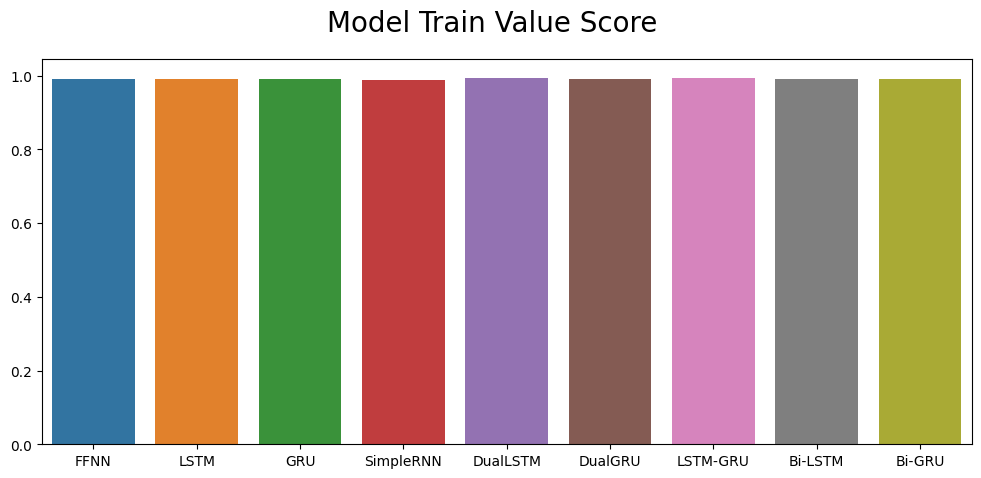

In [99]:
plt.figure(figsize=(12,5))
sns.barplot(x=model_name,y=model_train_score)
plt.suptitle('Model Train Value Score',fontsize=20)

Text(0.5, 0.98, 'Model Test Value Score')

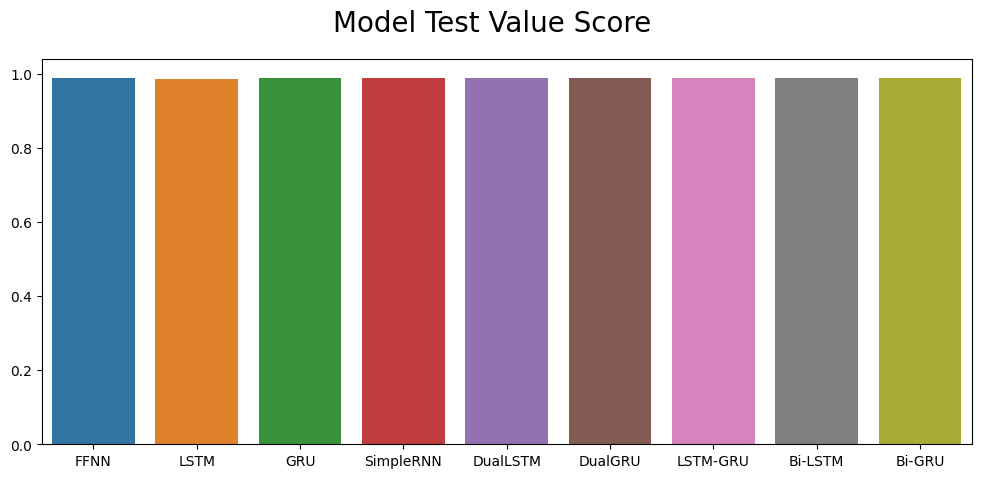

In [100]:
plt.figure(figsize=(12,5))
sns.barplot(x=model_name,y=model_test_score)
plt.suptitle('Model Test Value Score',fontsize=20)

# **Conclusion**

From the above performance of the deep learning model we can clearly see that the Bi-direction LSTM and GRU model's performs well in training and testing phase.